<!--HEADER-->
[*Guia de aulas da disciplina de Modelagem Matemática*](https://github.com/rmsrosa/modelagem_matematica) *do* [*IM-UFRJ*](https://www.im.ufrj.br).

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/14.00-Aula14.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 13: Epidemiologia: o modelo SIR em rede](13.00-Aula13.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 15: Exemplos de modelagem com EDP ->](15.00-Aula15.ipynb)

---


# Aula 14: Modelagem com Equações a Derivadas Parciais

## Objetivos:

- ver alguns algumas noções básicas de EDPs 
- ver alguns modelos classicos que usam EDPs
- construir aproximações numéricas às soluções, via diferenças finitas, com python
- simular a eq. de onda com 2 condições de contorno diferentes, simular a eq. de difussão

### Importando as bibliotecas necessárias

In [1]:
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from IPython.display import Image, HTML, clear_output

def path_files_aula8(filename=''):
    return join('..', 'dados', 'pendulo_angulos', filename)

def path_files_aula14(filename=''):
    return join('..', 'dados', 'edp', filename)

## Lembremos: Modelagem = 1+2+3

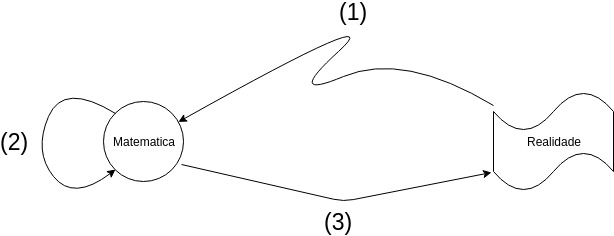

In [2]:
Image(filename=path_files_aula8('diagr_modelagem_def.jpg'), width=500)

- até agora, nos focamos em (1,2) que involvem **equações diferenciais ordinarias (EDO)**: equações que involvem derivadas com respeito a só uma variável (típicamente a variavel $t$ que representa o tempo)
- em geral, as quantidades que se desejam descrever dependem de muitas variáveis (eg: tempo, posição, temperatura, pressão, variáveis contextuais (eg: parémetros económicos), ...). 
- o fenômeno de que as 'leis' que regem o comportamento destas quantidades tomam forma simplificada no limite infinitesimal também vale para funções de muitas variáveis
- con grande generalidade, modelos para quantidades como funções de varias variáveis involvem **EDPs**



**Obs:** mesmo dentro da teoría de movimento de Newton, foi percebido logo que em muitos casos a relação $$m \ddot x = F$$ precisa ser complementada com um **modelo para $F$**, que típicamente involve uma outra equação do tipo EDP para $F$ (eg: força eletromagnética determinada pelas equações de Maxwell)

## mais comentarios:

- EDPs aparecem típicamente ligadas a problemas físicos (ou que podem ser ligados a estes por analogía)
- em física, muitas vezes as funções incógnita representam *valores médios macroscópicos* de quantidades microscopicas sujetas a leis complexas (eg: temperatura de gases, densidade/velocidade de fluidos, ...)
- muitas vezes, a EDP pode ser interpretada como uma versão infintesimal de uma *equação de balanço* (eg: balanço de massa, energia, forças, momento,...). Neste processo, primeiramente se tem versões integrais e depois se postula que o balance deve ser verificado infinitesimalmente.

### [Exemplo](https://cage.ugent.be/~ms/tea/PDEs/eerste_hoofdstuk.pdf)

- particulas com densidade $\rho(t,x), x\in \mathbb{R}^3$ são arrastadas por um campo de velocidades $x \mapsto v(x) \in \mathbb{R}^3$

- conservação da massa (ou numero de particulas): $\int_\Omega \partial_t \rho + \int_{\partial \Omega} \rho \ v\cdot n =0$ ( $n$ vetor normal ao bordo $\partial \Omega$)

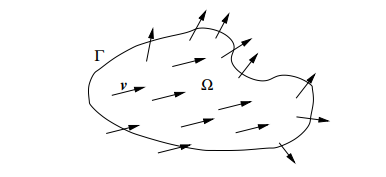

In [3]:
Image(filename=path_files_aula14('balance_massa.png'), width=300)

- usando [Teo de Gauss](https://en.wikipedia.org/wiki/Divergence_theorem), e promovendo a conservação a nível infinitesimal obtemos a EDP: **Equação de transporte linear**
$$ \partial_t \rho + div_x(\rho \ v) = 0, \forall t,x$$

## Resolvendo EDPs (teoria)

## resolvendo EDPs:

### Existencia:
nem sempre existem soluções. As vezes existem em certos sub-dominios e a solução desenvolve singularidades fora dele (eg: só existe para tempos curtos). O problema de existencia é dificil e não existem teorias gerais.



## resolvendo EDPs:


### Unicidade e condições de bordo: 
em geral, precisamos determinar algumas 'condições' para seleccionar uma única solução dentre muitas possiveis (analogamente a condições iniciais em EDO). Muitas vezes, estas condições são 'de bordo', ou seja, condições sob a função no bordo $\partial D$ do seu domínio $D$ de definição. Nomenclatura:

**tipo Dirichlet:** condições sob o valor da função no $\partial D$

**tipo Neumann:** condições sob o valor das derivadas função no $\partial D$ (típicamente, nas componentes normais ao bordo)

**Obs:** as vezes são mixtas, as vezes involvem $\| x \| \to \infty$ condiçoes no infinito,...





### Dependencia nas condições: 
uma propriedade boa da EDP é que a solução univocamente determinada por uma condição dependa continuamente dos parametros que entram na condição. Se não for o caso, isto dificulta a aproximação numérica (pois pequenas mudanças no esquema de aproximação podem resultar em grandes mudanças na solução!)

### Comentario:

lembremos que, em modelagem, precisamos que o modelo seja **"util"** [Aula 4]. 

Se uma EDP é complicada demais, não temos resultados teóricos de existencia e unicidade, e/ou não conseguimos aproximar a solução (computacionalmente) de maneira satisfatoria, etc. então não é um bom ingrediente para o modelo.

## Algumas definições teóricas gerais:

- Pensemos abstractamente numa função $u: D \subset \mathbb{R}^d \to \mathbb{R}$ com $d$ variáveis (a incógnita da EDP)
- se pensamos em todas as possíveis derivadas parciais, denotamos elas com *notação multi-indice*:
$$ \partial_x^\alpha u := \frac{\partial u}{\partial x_1^{\alpha_1} ...\partial x_d^{\alpha_d}}, \ \alpha=(\alpha_1,..,\alpha_d) $$

**Ex:** $\frac{\partial u}{\partial x_1 \partial x_2}$ tem multindice $\alpha = (1,1,0,..,0)$

- fixando $k$ número máximo de derivadas, temos um grande vetor que tem a coleção de todas as possiveis derivadas parciais até ordem $k$: (incluindo $u$ sem derivar para $\alpha = (0,0,..,0)$),
$$ \vec \partial^{(k)} u = (u, \frac{\partial u}{\partial x_1}, ... )$$

- uma EDP de ordem $k$ é uma expressão da forma 
$$ F(x, \vec \partial^{(k)} u (x) ) = 0 , \ \ \forall x \in D$$

- a EDP se diz *linear* se é da forma 
$$ \sum_{\alpha} a_\alpha(x) \partial_x^\alpha u (x) = 0 $$
- para EDPs de 2a ordem lineares, o termo $\sum_{i,j=1}^d a_{ij}(x) \partial^2 u / \partial x_i \partial x_j$ é o principal. Consideremos a matriz $(a_{ij}(x))$ para todos os $x$.  A EDP se chama: *parabólica* se a matriz tem nucleo, *eliptica* se tem todos os autovalores $\neq 0$ e do mesmo sinal, *hiperbolica* se tem todos os autovalores $\neq 0$ e todos menos um tem o mesmo sinal.

- existem noções de semilinear, quasilinear, etc.

- um exemplo *não-linear* é
$$ div( \frac{grad(u)}{\sqrt{1+\| grad(u) \|^2}} ) = 0 $$
(aparece na descrição de superficies minimas, eg: bolhas de sabão)

- podemos tambem ter *sistemas de EDPs* com varias incognitas $u_1,..,u_m$ (ou pensar $U:D\subset \mathbb{R}^d \to \mathbb{R}^m$ como incógnita) 

**Ex**: $U(t,x) = (E(t,x),B(t,x)) \in \mathbb{R}^3 \times \mathbb{R}^3$ campo eletrico e magnetico nas eqs. de Maxwell

**Obs:** algumas EDPs aparecem como caracterizando soluções de problemas variacionais: achar $u$ que minimiza uma certa expressão funcional $S[u]$ (Eg: superficie minima, energia minima, ..., funcionais de fisica-matematica como 'Einstein-Hilbert' para o espaço-tempo,...)

## Alguns exemplos clássicos:

- **eq. de difusão** (eg: temperatura via transferencia de calor): $u\equiv u(t,x)$, $x \in \mathbb{R}^n$ 
$$\partial_t u = c \Delta u = c \sum_{i=1}^n \frac{\partial^2 u}{\partial x_i^2}$$

**Obs:** é um paradigma de eq. *difusivas* (aqui o calor esta sendo difundido), é linear, de 2a ordem (parabólica)

- **eq. da onda**:  $u\equiv u(t,x)$, $x \in \mathbb{R}^n$ 

$$\partial_t\partial_t u = c^2 \Delta u $$

**Obs:** é hiperbólica, é um paradigma de eq. que aparecem em fisica-matematica com generalizações que vão desde mecanica do continuo até mecanica quantica, relatividade e geofísica.


### Lógica por trás da eq. do calor: ([ref](https://ocw.mit.edu/courses/mathematics/18-303-linear-partial-differential-equations-fall-2006/lecture-notes/heateqni.pdf))

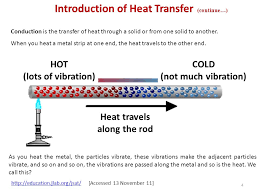

In [4]:
Image(filename=path_files_aula14('transf_calor.png'), width=300)

- pensemos em uma barra 1-dimensional com temperatura $u(x)$ na posição $x \in [0,L]$ (em $x$ temos um "slice" de uma barra física com área finita e largura $\Delta x$)
- (hipótese da energía térmica) um slice da barra em $x$ possui uma densidade energía $E(x) \propto u(x) \Delta x$ devida a sua temperatura
- (hipótese sobre a transferencia de energia termica) a energia termica se transfere (em forma calor $Q$ por unidade de área transversal da barra) de regiões mais quentes às mais frias seguindo a lei $ Q \propto -\partial_x u$
- (hipótese da conservação de energía) assumimos que a energia se conserva ao longo da barra, que não tem fontes  no interior nem transferencia transversal
- pensamos agora que a temperatura e a energía estão mudando com o tempo $t$. Na posição $x$, ao transcurrir $t \to t+\Delta t$ pequeno:
$$ E(t+\Delta t,x) - E(t,x) \propto (Q_{in}(x) - Q_{out}(x+\Delta x)) \Delta t$$
onde $Q_{in/out}$ é o calor que entrou/saiu no slice transversal em $x$ pela ezq/dir.
- chegamos em que 
$$ \frac{ u(t+\Delta t,x) - u(t,x)}{\Delta t} \propto \frac{-\partial_x u (t,x) + \partial_x u(t,x+\Delta x)}{\Delta x}$$

- no limite infinitesimal $\Delta t \to 0$ e $\Delta x \to 0$ esperamos
$$ \partial_t u (t,x) = c \partial_x^2 u (t,x) \ \forall (t,x)$$
que se postula como a EDP para a difussão do calor

**Obs**: pode-se entender esta equação de muitas maneiras. 

Uma outra é no contexto de probabilidade e mecanica estatística: $u(t,x)$ representa a *densidade de probabilidade a tempo $t$* para um *processo estocástico* que evolui como o tempo (seguindo uma *equação estocástica* que involve o [*movimento Browniano*](https://en.wikipedia.org/wiki/Wiener_process) classico, veja tambem a [eq. Fokker-Plank](https://en.wikipedia.org/wiki/Fokker%E2%80%93Planck_equation)). Sobre a relação da eq. do calor ao movimento Browniano: [ref](http://stat.math.uregina.ca/~kozdron/Research/UgradTalks/BM_and_Heat/heat_and_BM.pdf). Estes processos também podem ser entendidos como limites de [*random walks*](https://en.wikipedia.org/wiki/Random_walk). Em todos estes enfoques, $u$ representa uma quantidade 'macroscopica' de processos 'microscopicos' aleatorios subjacentes.

### Lógica por trás da eq. da onda: [wiki](https://en.wikipedia.org/wiki/Wave_equation)

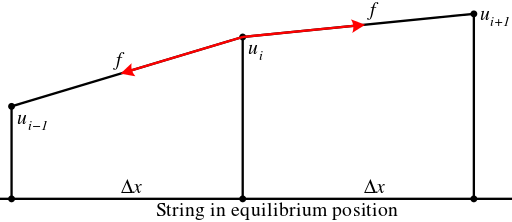

In [5]:
Image(filename=path_files_aula14('string_wave.png'), width=300)

- pensamos uma corda feita de massas pontuais com posição $(x_j,u_j)\in \mathbb{R}^2$, com $u_j=0$ representando a posição de equilibrio
- cada massa $m_j$ sente uma força ("tensão") dos seus primeiros vizinhos modelada como se fosse uma [mola](https://en.wikipedia.org/wiki/Hooke%27s_law) 
$$F_{j,j + 1} =k (u_{j+1}-u_j)$$
- usando a teoria de Newton para $u_j\equiv u_j(t)$ (2a lei e ação-reação) chegamos em
$$ m_j \partial_t^2 u_j = F_{j,j+1} - F_{j-1,j} = k( u_{j+1}-2u_j+u_{j-1}) $$
com $[k]=[massa]/[tempo]^2$
- suponhamos que $j=1,..,N$, que as massas são iguais $m_j=m$, e que os $x_j$ estão equi-espaciados $x_{j+1}=x_j + \Delta x$. Queremos reexpressar em termos de quantidades "macroscópicas".
- colocando $N$ [molas em série](https://en.wikipedia.org/wiki/Series_and_parallel_springs), se chega a que o total se comporta como uma mola com constante $k_{tot} = k/N$. Postulamos que $k_{tot}$ é uma quantidade macroscópica que devería aparecer na EDP.
- a massa total é $M=Nm$ e o comprimento é $L=Nh$, logo
$$  \frac{k}{m} = \frac{Nk}{M} = \frac{N^2 k_{tot}}{M} = \frac{L^2 k_{tot}}{M} \frac{1}{\Delta x^2}$$ 

- notar $[\frac{L^2 k_{tot}}{M}] = ([dist]/[tempo])^2$. Chamamos 
$$ c^2 = \frac{L^2 k_{tot}}{M}$$
onde $c$ tem unidades de velocidade.
- obtemos a eq.
$$ \partial_t^2 u_j = c^2 \frac{ u_{j+1}-2u_j+u_{j-1}}{\Delta x^2} $$
- no limite $h\to 0$, vira
$$ \partial_t^2 u (t,x) = c^2 \partial_x^2 u (t,x), \ \ \forall (t,x) $$
e se postula que esta EDP governa o movimento da corda.

## Aproximação numérica as soluções via diferenças finitas

- a ideia é fazer uma *versão discreta* das derivadas que aparecem na EDP:
$$ \frac{\partial u}{\partial x_i} (x) \to \delta_{x_i} u(x) := \frac{u(x+\Delta x \cdot e_i)  - u(x)}{\Delta x_i} $$
$e_i = (0,..,0,1,0,..,0)$ elemento i-esimo da base canonica de $\mathbb{R}^d$.

**Obs:** quando $\Delta x_i \to 0$, $\delta_{x_i}u \to \frac{\partial u}{\partial x_i}$.

- para derivadas segundas, usamos
$$ \delta^2_{x_i} u(x):= \frac{u(x+\Delta x \cdot e_i)  - 2 u(x) +u(x - \Delta x \cdot e_i) }{(\Delta x_i)^2} $$

**Obs:** quando $\Delta x_i \to 0$, $\delta^2_{x_i}u \to \frac{\partial^2 u}{\partial x^2_i}$. 

**Obs:** Existem outras aproximações discretas as derivadas de qualquer ordem, em cada problema pode ser melhor usar uma ou outra.


- **Discretização do dominio:** da função $x \mapsto u(x)$ só guardamos os valores em alguns pontos. Por exemplo, se o dominio $D = [a_1,b_1]\times ... \times [a_d,b_d]$ (um tijolo d-dimensional), dividimos cada $[a_i,b_i]$ em subintervalos de comprimento $\Delta x_i$, e guardamos
$$ u(a_1 + m_1 \Delta x_1, ... , a_d + m_d \Delta x_d) =: u_d (m_1,..,m_d),$$
$m_j=1,..,n_{x_j}$
- **Discretização da EDP**: trocar cada $\frac{\partial u}{\partial x_1^{\alpha_1} ...\partial x_d^{\alpha_d}}$ por aproximações discretas involvendo "diferenças finitas (não infinitesimais)" dos $u_d$ e resolver *algebricamente*

### Exemplo:

- incognita $u(t,x)$, com $x \in [0,L_x] \subset \mathbb{R}^1$ "temperatura a tempo $t\in [0,T]$ na posicao $x$" 
- **eq. simplificada de transferencia de calor (1-d espacial)**:
$$ \partial_t u = - k \partial_x u, \forall t,x$$
- discretização: $t = m_t \Delta t$, $m_t =0,..,n_t$ grade temporal,  $x=m_x \Delta x$, $m_x=1,..,n_x$ grade espacial,
$$ u(m_t \Delta t, m_x \Delta x) =: u_d (m_t,m_x)$$
- eq. discretizada
$$ \frac{u_d(m_t+1,m_x)-u_d(m_t,m_x)}{\Delta t} = - k \frac{u_d(m_t,m_x+1)-u_d(m_t,m_x)}{\Delta x}$$
$$ \iff $$ 
$$ u_d(m_t + 1,m_x) = u_d(m_t,m_x) - k \frac{\Delta t}{\Delta x} (u_d(m_t,m_x+1)-u_d(m_t,m_x) ) $$

**Obs**: se conhecemos $u_d(m_t,m_x)$ para todos $m_x=1,..,n_x$ e para $m_t \leq r$, a eq. acima permite resolver para $m_t = r +1$.


## Exemplos de simulações numéricas

## Eq. de onda com $n=1$
- incognita $u(t,x), \ t\in [0,T_{max}], \ x\in [0,L_x] \subset \mathbb{R^{n=1}}$
- equação
$$ \partial_t^2 u = c^2 \partial_x^2 u$$ 
- condições de bordo 
$$u(t=0,x) = f(x), \partial_t u (t=0,x) = v(x) $$ 
$$u(t,x=0) = 0 \ u(t, x=L_x) = 0 , \ (Dirichlet)$$

- notar que, para qualquer $f$ suave com $f(0)=f(L_x)=0$, 
$$ u(t,x) = f(x \pm c t)$$
é uma solução tipo **onda viajante** (para $t$ pequeno, antes de chegar ao bordo de $[0,L_x]$)
- vamos escolher a velocidade inicial $v(x)$ implicitamente para que $$u(0+\Delta t, x) = f(x \pm c \Delta t) $$

### discretização:

- eq. discretizada
$$ \delta^2_{t} u(t,x)= c^2 \delta_x^2 u(t,x)$$

- escrevendo $u_d(m_t,m_x) = u(m_t \Delta t, m_x \Delta x)$,
$$ u_d(m_t+1,m_x) = 2 u_d(m_t,m_x) - u_d(m_t-1,m_x) + c^2 \frac{(\Delta t)^2}{(\Delta x)^2} (u_d(m_t,m_x+1) - 2 u_d(m_t,m_x) + u_d(m_t,m_x-1))   $$ 
permite resolver em $t=(m_t+1)\Delta t$ sabendo os dados em $t=m_t \Delta t$ (comença com as condições iniciais em $t$)
- condições de bordo em $x$: $u(m_t,0) = 0 = u(m_t, n_x), \ \forall m_t=0,..,n_t$

In [6]:
# parametros da EDP
Lx = 4000     # metros
Tmax = 3    # seg
c = 3000.0    # metros por seg

# parametros de discretização
nx = 400      # numero de pontos na grade x
dx = Lx/nx    # delta x
dt = dx/2/c    # delta t
nt = int(Tmax / dt) # numero de pontos na grade t


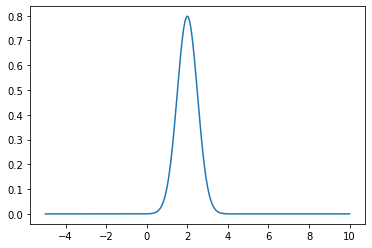

In [7]:
# a funcao gaussiana para usar como condicao inicial
def normal(x,sigma,mu):
    ret = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    return ret
sigma=1/2
mu=2
intx=np.linspace(-5,10,1000)
plt.plot(intx,[normal(x,sigma,mu) for x in intx])
plt.show()

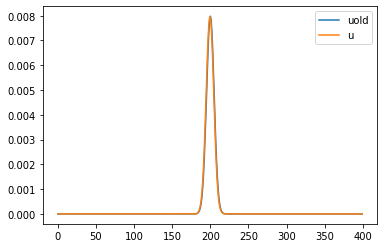

In [8]:
# Condiçoes iniciais e inicialização de variaveis
u = np.zeros(nx)
uold = np.zeros(nx) 
unew = np.zeros(nx)
uxx = np.zeros(nx)
# uma funçao de x
def funf(x):
    sigma = 5*dx
    mu = Lx/2
    ret=normal(x,sigma,mu)   
    return ret
for ix in range(nx):
    uold[ix] = funf(ix*dx) # u(t=0,x)=f(x)
    u[ix] = funf(ix*dx +c*dt) # u(t=0 +Delta t,x) = f(x+c Delta t) onda viagante a ezquerda
plt.plot(uold, label='uold')
plt.plot(u, label='u')
plt.legend()
plt.show()

In [9]:
# evolução temporal
uts = []
uts.append(uold)
for it in range(nt):
    uts.append(u)
    uxx[1:nx-1] = u[2:nx] - 2*u[1:nx-1] + u[:nx-2] #mantemos os extremos x=0,L sempre com uxx=0
    uxx /= dx ** 2
    # extrapolacao temporal
    unew = 2 * u - uold + dt ** 2 * c ** 2 * uxx 
    uold, u = u, unew
   

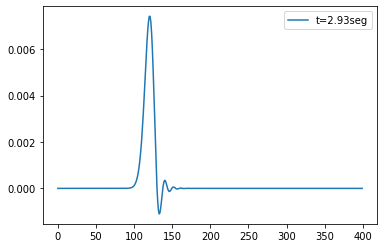

In [10]:
# plotando t mapsto u(t,x)
def plotar_u(isnap,intervalo,uts):
    for it in intervalo:
        if it % isnap == 0:    # se isnap é maior, temos menos frames
            leg = 't='+ str(int(100*(it*Tmax/nt))/100) +'seg'
            plt.plot(uts[it],label=leg)
            plt.legend()
            clear_output(wait = True)
            plt.pause(0.1)
    return

#plotar para todo t
isnap =40  # frequencia de ploteo
intervalo = range(nt)
plotar_u(isnap,intervalo,uts)


In [11]:
# gerando um gif
def gerar_gif(isnap, tempos, uts, nome_arch, intervalo_gif): 
    fig, ax = plt.subplots()
    ax.plot(uts[0])
    def update(i):
        label = 't='+ str(int(100*(i*Tmax/nt))/100) +'seg'
        ax.clear()
        ax.plot(uts[i])
        ax.set_xlabel(label)
        return ax
    anim = FuncAnimation(fig, update, frames=tempos, interval=intervalo_gif)
    anim.save(path_files_aula14()+ nome_arch +'.gif', dpi=80, writer='imagemagick')
    
isnap = 40    # frequencia de ploteo
tempos = [it for it in range(nt) if it % isnap == 0]
intervalo_gif = 5*len(tempos) # quanto maior o intervalo_gif, mais tempo vai ficar em cada frame na reproducao
#gerar_gif(isnap,tempos,uts,'onda_refletada_full',intervalo_gif)


![](../dados/edp/onda_refletada_full.gif)

### Obs: a onda se propaga inicialmente para a esquerda (por que?)


### Obs: a onda se propaga para a esquerda (por que?)

porque colocamos as condições iniciais correspondentes a solução viajante a esq. $u(t,x) = f(x + ct)$, o ponto $x+ct$ esta a direita de $x$, logo $u$ "ve" que o grafico de $f$ se move para a esquerda

### Obs: a velocidade da onda é $c$

- notar que colocamos $ c=3000 m/s$ e o comprimento espacial $L_x = 4000 m$, e a função $u(t=0,x)$ estava centrada em $x=L_x/2$, logo deve demorar $\sim 1.33s$ em voltar ao ponto inicial depois de refletir uma vez.

- o tempo de simulaçao é $T_{max} = 3s$, logo deveria se refletir 2 veces (e andar mais um pouquinho), que é o que a onda simulada, de fato, faz!

### Obs: a onda se "reflite invertida" quando chega nos extremos $x=0,L_x$. Vejamos com detalhe:

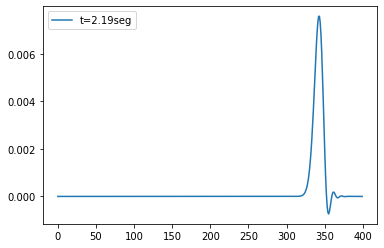

In [12]:
# vendo como a onda reflite
ot = 2 # seg
iot = int(ot/dt)
jant = 0.2 # seg
ijant = int(jant/dt)
intervalo = range(iot - ijant,iot + ijant) #indices de tempo
isnap = 5
plotar_u(isnap,intervalo,uts)

In [13]:
isnap = 5    # frequencia de ploteo
tempos = [it for it in intervalo if it % isnap == 0]
intervalo_gif = 5*len(tempos) # quanto maior o intervalo_gif, mais tempo vai ficar em cada frame na reproducao
# gerar_gif(isnap,tempos,uts,'onda_refletada_detalhe',intervalo_gif)


![](../dados/edp/onda_refletada_detalhe.gif)

## Implementando outras condições de contorno 

### "extremos livres"

$$ u(t=0,x) = f(x), \ \partial_tu(t=0,x) = v(x) (*)$$

$$ \partial_x u(t,x=0) = 0, \partial_x u(t, x=L_x) = 0 \ \ (Neumann)$$

(* ) como antes

### Sobre a discretização de derivadas num bordo em geral ([ [Ref](https://link.springer.com/chapter/10.1007/978-3-319-55456-3_2#Equ62) ]*)

- suponhamos que temos $f(x)$ geral definida em $[a,b]$ e queremos modelar $\partial_x f(a)$
- é comum usar uma "diferença finita centrada" 
$$ \partial_x f(a) \simeq \frac{f(a+\Delta x) -f(a-\Delta x)}{2\Delta x} (=: D_{2t}f(a)) $$

- aplicando isto a nossa condiçao Neumann obtemos uma (possivel) versao discreta:
$$ u(t,-\Delta x) = u(t, \Delta x) , \ \ u(t, L_x - \Delta x) = u(t, L_x + \Delta x) $$

( * ) Linge S., Langtangen H.P. (2017) Wave Equations. In: Finite Difference Computing with PDEs. Texts in Computational Science and Engineering, vol 16. Springer, Cham


### um truque para condições de Neumann: 

- para implementar as condicoes Neumann em $x$ sem ter que modificar o metodo, consideramos os intervalos extendidos com 2 pontos "ghost" $[-\Delta x, L_x + \Delta x]$ 
- o indice iria: $m_x= -1,0,...,n_x, n_x +1$

**Obs:** no python nao tem indices negativos, então fazemos um shift para a direita
$$ \tilde m_x = m_x +1$$

- a ideia é resolver com mesmo o algoritmo anterior (que podia implementar automaticamente condições Dirichlet pois nao mexia com os valores de u em $x=0,L$) mas agora em $[-\Delta x,L_x+\Delta x]$ e usar os pontos ghost para impor que a "derivada centrada" seja zero nos extremos:
$$ u_d(m_t, -1) = u_d(m_t, 1) = , \ u_d(m_t,n_x-1) = u_d(m_t,n_x+1) $$

In [14]:
# parametros da EDP
Lx = 4000     # metros
Tmax = 3   # seg
c = 3000.0    # metros por seg

# parametros de discretização
nx = 400      # numero de pontos na grade x
dx = Lx/nx    # delta x
dt = dx/2/c    # delta t
nt = int(Tmax / dt) # numero de pontos na grade t


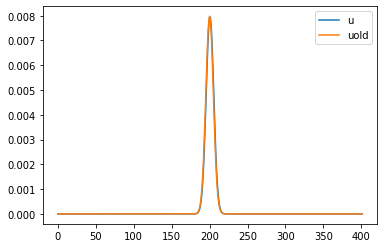

In [15]:
# Condiçoes iniciais e inicialização de variaveis com ghost points
# parametros de discretização
nxg = nx+2     # numero de pontos na grade x
u = np.zeros(nxg)
uold = np.zeros(nxg) 
unew = np.zeros(nxg)
uxx = np.zeros(nxg)
for ix in range(nx):
    uold[ix] = funf(ix*dx) # u(t=0,x)=f(x)
    u[ix] = funf(ix*dx - c*dt) # u(t=0 +Delta t,x) = f(x+c Delta t) onda viagante a ezquerda
plt.plot(u, label='u')
plt.plot(uold, label='uold')
plt.legend()
plt.show()

In [16]:
# evoluçao com os extremos livres
uts = []
for it in range(nt):
    uxx[1:nxg-1] = u[2:nxg] - 2*u[1:nxg-1] + u[:nxg-2] # é o mesmo do que antes!
    uxx /= dx ** 2
    unew = 2 * u - uold + dt ** 2 * c ** 2 * uxx
    # truque para cond Neumann com ghost pointsÇ
    unew[0]=float(unew[2])
    unew[nxg-1]=float(unew[nxg-3])
    uold, u = u, unew
    uts.append(u)

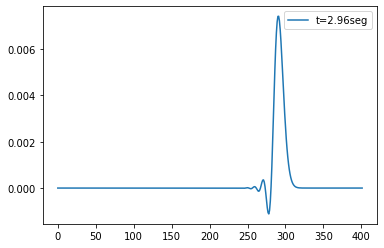

In [17]:
#plotar para todo t
isnap = 20   # frequencia de ploteo
intervalo = range(nt)
plotar_u(isnap,intervalo,uts)

In [18]:
# geramos gif
isnap = 20    # frequencia de ploteo
tempos = [it for it in range(nt) if it % isnap == 0]
intervalo_gif = 5*len(tempos) # quanto maior o intervalo_gif, mais tempo vai ficar em cada frame na reproducao
#gerar_gif(isnap,tempos,uts,'onda_ref_Neumann_full',intervalo_gif)


![](../dados/edp/onda_ref_Neumann_full.gif)

### Obs: agora se reflite sem virar para baixo!

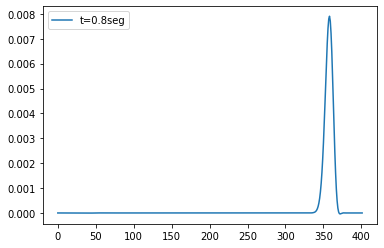

In [19]:
# vendo como a onda reflite
ot = 0.66 # seg
iot = int(ot/dt)
jant = 0.15 # seg
ijant = int(jant/dt)
intervalo = range(iot - ijant,iot + ijant) #indices de tempo
isnap = 2
plotar_u(isnap,intervalo,uts)

In [20]:
isnap = 2    # frequencia de ploteo
tempos = [it for it in intervalo if it % isnap == 0]
intervalo_gif = 5*len(tempos) # quanto maior o intervalo_gif, mais tempo vai ficar em cada frame na reproducao
# gerar_gif(isnap,tempos,uts,'onda_ref_Neum_detalhe',intervalo_gif)


![](../dados/edp/onda_ref_Neum_detalhe.gif)

## Eq. de difusão com $n=1$

- incognita $u(t,x), \ t\in [0,T_{max}], \ x\in [0,L_x] \subset \mathbb{R^{n=1}}$
- equação
$$ \partial_t u = c \partial_x^2 u$$ 
($c$ agora significa outra coisa: $[c] = [dist]^2/[tempo]$)

- condições de bordo (Dirichlet)
$$u(t=0,x) = f(x),$$ 
$$ u(t,x=0) = 0 \ u(t, x=L_x) = 0$$

**Obs**: notar que como é de primeira ordem em $t$, só precisamos 1 cond. inicial em $t=0$ (ou $t=T_{max}$)

### discretização:

- $ \delta_t u = c \delta_x^2 u$:

$$ u_d(m_t+1,m_x) = u_d(m_t,m_x) + c \frac{\Delta t}{(\Delta x)^2} (u_d(m_t,m_x+1) - 2 u_d(m_t,m_x) + u_d(m_t,m_x-1))   $$

permite achar a evolução $t \mapsto t+\Delta t$ (partindo das cond. inic.)

- cond. contorno Dirichlet: $u_d(m_t,0)=0=u_d(m_t,n_x), \forall m_t$

In [21]:
#parametros
Lx = 4000    
Tmax = 100   
nx = 400     
dx = Lx/nx   
c = 5000.0    
dt = dx/2/c  
nt = int(Tmax / dt) 

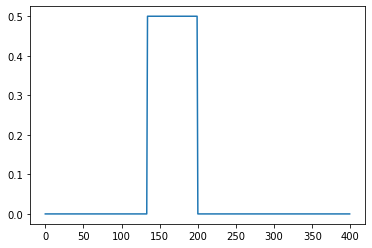

In [22]:
# condições iniciais
u = np.zeros(nx)
uold = np.zeros(nx)
unew = np.zeros(nx)
uxx = np.zeros(nx)
# funçao step
def funcao(ix):
    ret=0
    if ix > nx/3 and ix < nx/2:
       ret = 0.5
    return ret
for ix in range(nx):
    u[ix] = funcao(ix) # u(0,x)=f(x)
plt.plot(u)
plt.show()

In [23]:
# Evolução temporal
uts = []
for it in range(nt):
    uxx[1:nx-1] = u[2:nx] - 2*u[1:nx-1] + u[:nx-2]
    uxx /= dx ** 2
    unew =  u + dt * c * uxx 
    uold, u = u, unew
    uts.append(u)

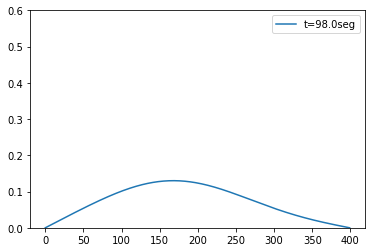

In [24]:
# plotando tudo t mapsto ut
isnap = 2000    
intervalo = range(nt)
for it in intervalo:
    if it % isnap == 0:    # se isnap é maior, temos menos frames
        leg = 't='+ str(int(100*(it*Tmax/nt))/100) +'seg'
        plt.ylim(ymin=0,ymax=0.6)
        plt.plot(uts[it],label=leg)
        plt.legend()
        clear_output(wait = True)
        plt.pause(0.1)

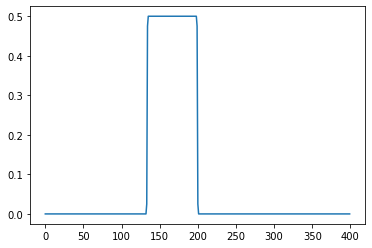

In [25]:
#geramos um gif
nome_arch = 'difusao'
isnap = 2000    # frequencia de ploteo
tempos = [it for it in range(nt) if it % isnap == 0]
intervalo_gif = 5*len(tempos) # quanto maior o intervalo_gif, mais tempo vai ficar em cada frame na reproducao
fig, ax = plt.subplots()
ax.plot(uts[0])
def update(i):
    label = 't='+ str(int(100*(i*Tmax/nt))/100) +'seg'
    ax.clear()
    ax.plot(uts[i])
    ax.set_ylim([0,0.6])
    ax.set_xlabel(label)
    return ax
# anim = FuncAnimation(fig, update, frames=tempos, interval=intervalo_gif)
# anim.save(path_files_aula14() + nome_arch +'.gif', dpi=80, writer='imagemagick')

![](../dados/edp/difusao.gif)

### Obs: a função inicial "derrete" !

## Exercicios:

- simular a eq. de difusão com condições de contorno Neumann em $x$
- variar os parametros em todas as simulações para entender o comportamento e o papel das constantes
- graficar (3d) a função de duas variáveis $(t,x) \mapsto u(t,x)$ para entender o papel das condições de contorno
- (* ) fazer um "solver" que receve uma EDP para $u(t,x)$ (que só depende das derivadas até grau 2), os intervalos de definição de $t,x$ e as condicoes de bordo (tipo Dirichlet ou Neumann em $t=0,T_max$ e $x=0,L_x$) e devolve a solução
- simular a eq. de onda e a de difusão com duas variáveis espaciais, é disser, $u\equiv u(t,x,y)$

In [26]:
# gerar slides deste notebook desde code:

!jupyter nbconvert 14.00-Aula14.ipynb --to slides --SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook 14.00-Aula14.ipynb to slides
[NbConvertApp] Writing 536763 bytes to 14.00-Aula14.slides.html


<!--NAVIGATOR-->

---
[<- Aula 13: Epidemiologia: o modelo SIR em rede](13.00-Aula13.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 15: Exemplos de modelagem com EDP ->](15.00-Aula15.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/14.00-Aula14.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;